# **Importing Statments**

In [ ]:
from google.colab import files
import nltk
from nltk.corpus import stopwords
from nltk import TreebankWordTokenizer
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import string 

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Reading the dataset from kaggle**

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedtarek122","key":"8649a23c261b9b7a8eaf365c22cb931a"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d abedkhooli/arabic-100k-reviews

 53% 9.00M/17.0M [00:00<00:00, 20.7MB/s]
100% 17.0M/17.0M [00:00<00:00, 40.2MB/s]


In [ ]:
# The "sep='\t'" statment is used to seperate the datasets into two columns instead of one, so that a column contains the text review 
#and a column containt the label (sentiment) of the review

df = pd.read_csv('arabic-100k-reviews.zip',sep='\t')

# **Data Understanding**

In [ ]:
# Getting familiar with the dataset
df.head(1)

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...


In [ ]:
#Renaming the dataset to more accurate column headings
df = df.rename(columns={'label': 'sentiment'})
df = df.rename(columns={'text': 'review'})

In [ ]:
df.head(1)

,sentiment,review
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...


In [ ]:
# Used to know how many columns and rows are in the dataset
df.shape

(99999, 2)

In [ ]:
# used to know the name of the columns in the dataset
print(df.columns)

Index(['sentiment', 'review'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  99999 non-null  object
 1   review     99999 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
# Showing how many values are missing per column
df.isna().sum()

sentiment    0
review       0
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

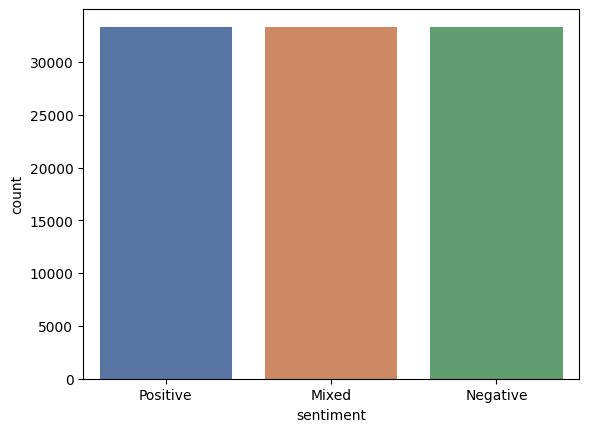

In [ ]:
#To check if the dataset is balanced 
sns.countplot(x = 'sentiment', data = df, palette = 'deep')

In [ ]:
# to check if there is any null values
df.isnull().sum()

sentiment    0
review       0
dtype: int64

In [ ]:
#to check if there is any duplicates
df.duplicated().sum()

0

# **Data preparation**

In [ ]:
tokenizer = TreebankWordTokenizer()
df['review'] = df['review'].apply(lambda review: tokenizer.tokenize(review))

0        [ممتاز, نوعا, ما, ., النظافة, والموقع, والتجهي...
1        [أحد, أسباب, نجاح, الإمارات, أن, كل, شخص, في, ...
2        [هادفة, .., وقوية., تنقلك, من, صخب, شوارع, الق...
3        [خلصنا, .., مبدئيا, اللي, مستني, ابهار, زي, ال...
4        [ياسات, جلوريا, جزء, لا, يتجزأ, من, دبي, ., فن...
                               ...                        
99994    [معرفش, ليه, كنت, عاوزة, أكملها, وهي, مش, عاجب...
99995    [لا, يستحق, ان, يكون, في, بوكنق, لانه, سيئ, .,...
99996    [كتاب, ضعيف, جدا, ولم, استمتع, به., فى, كل, قص...
99997    [مملة, جدا., محمد, حسن, علوان, فنان, بالكلمات،...
99998    [لن, ارجع, إليه, مرة, اخرى, ., قربه, من, البحر...
Name: review, Length: 99999, dtype: object

In [ ]:
df.head()

,sentiment,review
0,Positive,"[ممتاز, نوعا, ما, ., النظافة, والموقع, والتجهي..."
1,Positive,"[أحد, أسباب, نجاح, الإمارات, أن, كل, شخص, في, ..."
2,Positive,"[هادفة, .., وقوية., تنقلك, من, صخب, شوارع, الق..."
3,Positive,"[خلصنا, .., مبدئيا, اللي, مستني, ابهار, زي, ال..."
4,Positive,"[ياسات, جلوريا, جزء, لا, يتجزأ, من, دبي, ., فن..."


In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('arabic')
print(stop_words)

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(len(stop_words))

754


In [ ]:
arabic_diacritics = re.compile(""" ّ    |
                             َ    |
                             ً    |
                             ُ    |
                             ٌ    |
                             ِ    |
                             ٍ    |
                             ْ    |
                             ـ     
                         """, re.VERBOSE)

for i in range(len(stop_words)):
    stop_words[i] = arabic_diacritics.sub("", stop_words[i])

print(stop_words)

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [ ]:
negation_words = ['لا', 'ليس', 'غير', 'لن', 'لم', 'ليست']
stop_words = [word for word in stop_words if word not in negation_words]
print(stop_words)

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', 'قد', 'ك

In [ ]:
print(len(stop_words))

748


In [ ]:
df['review'] = df['review'].apply(lambda review: [word for word in review if word not in stop_words])

In [ ]:
df.head(14)

,sentiment,review
0,Positive,"[ممتاز, نوعا, ., النظافة, والموقع, والتجهيز, و..."
1,Positive,"[أسباب, نجاح, الإمارات, شخص, الدولة, يعشق, ترا..."
2,Positive,"[هادفة, .., وقوية., تنقلك, صخب, شوارع, القاهرة..."
3,Positive,"[خلصنا, .., مبدئيا, اللي, مستني, ابهار, زي, ال..."
4,Positive,"[ياسات, جلوريا, جزء, لا, يتجزأ, دبي, ., فندق, ..."
5,Positive,"[أسلوب, الكاتب, رائع, جدا, عميق, جدا،, قرأته, ..."
6,Positive,"[استثنائي., الهدوء, الجناح, مسبح., عدم, وجود, ..."
7,Positive,"[الكتاب, السيرة, الذاتية, للحداثة, المملكة, بل..."
8,Positive,"[أجمل, قرأت.., رواية, تستحق, القراءة, فعلا..]"
9,Positive,"[بشكل, عام, جيده, .., ., التجاوب, جيد, جدا, مو..."


In [ ]:
df['review'] = df['review'].apply(lambda review : list(filter(None,[word.replace('.', '').replace('_','').replace('-','').replace("'","" ).replace("`","") for word in review if word not in string.punctuation])))

In [ ]:
df.head()

,sentiment,review
0,Positive,"[ممتاز, نوعا, النظافة, والموقع, والتجهيز, والش..."
1,Positive,"[أسباب, نجاح, الإمارات, شخص, الدولة, يعشق, ترا..."
2,Positive,"[هادفة, وقوية, تنقلك, صخب, شوارع, القاهرة, الى..."
3,Positive,"[خلصنا, مبدئيا, اللي, مستني, ابهار, زي, الفيل,..."
4,Positive,"[ياسات, جلوريا, جزء, لا, يتجزأ, دبي, فندق, متك..."


In [ ]:
import nltk
from nltk.stem.isri import ISRIStemmer

# create a stemmer object
stemmer = ISRIStemmer()
df['review'] = df['review'].astype(str)

# define a function to perform lemmatization
def lemmatize(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [stemmer.stem(w) for w in words]
    return ' '.join(lemmatized_words)

# apply the lemmatize function to the 'review' column
df['review'] = df['review'].apply(lemmatize)

In [ ]:
df.head()

,sentiment,review
0,Positive,"[ 'ممتاز ' , 'نع ' , 'النظافة ' , 'والموقع ' ,..."
1,Positive,"[ 'أسباب ' , 'نجاح ' , 'الإمار ' , 'شخص ' , 'ا..."
2,Positive,"[ 'هدف ' , 'وقو ' , 'تنقل ' , 'صخب ' , 'شوارع ..."
3,Positive,"[ 'خلص ' , 'مبدئ ' , 'لل ' , 'مس ' , 'ابهار ' ..."
4,Positive,"[ 'يس ' , 'جلور ' , 'جزء ' , 'لا ' , 'يتجزأ ' ..."


# **Modelling**

In [ ]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2)

# Create a pipeline that vectorizes the text data and trains a Naive Bayes classifier
vectorizer = CountVectorizer()
clf = MultinomialNB(alpha=1)
pipe = make_pipeline(vectorizer, clf)

# Perform 10-fold cross-validation on the training data
cv_scores = cross_val_score(pipe, x_train, y_train, cv=10, scoring='f1_macro')

# Train the pipeline on the entire training data
pipe.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(x_test)

# Evaluate the performance of the classifier using F1 score
f1 = f1_score(y_test, y_pred, average='macro')

# Print the F1 score for the test data and cross-validation
print('F1 Score (Test):', (f1*100),"%")
print('Cross-Validation Mean F1 Score:', (np.mean(cv_scores)*100),"%")
print('Cross-Validation Standard Deviation:', (np.std(cv_scores)*100),"%")


F1 Score (Test): 61.7587087987164 %
Cross-Validation Mean F1 Score: 61.35801665521442 %
Cross-Validation Standard Deviation: 0.8239916770069537 %


In [ ]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2)

# Define the pipeline
vectorizer = TfidfVectorizer()
clf = DecisionTreeClassifier(random_state=42)
pipe = make_pipeline(vectorizer, clf)

# Perform 10-fold cross-validation on the training data
cv_scores = cross_val_score(pipe, x_train, y_train, cv=10, scoring='f1_macro')

# Train the model on the entire training data
pipe.fit(x_train, y_train)

# Predict the test set labels
y_pred = pipe.predict(x_test)

# Evaluate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')

# Print the F1 score and cross-validation results
print(f"F1 Score: {f1:.2f}")
print('Cross-Validation Mean F1 Score:', cv_scores.mean())
print('Cross-Validation Standard Deviation:', cv_scores.std())

In [ ]:
df = df[df['sentiment']!='Mixed']

In [ ]:
df.shape

(66666, 2)

In [ ]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2)

# Create a pipeline that vectorizes the text data and trains a Naive Bayes classifier
vectorizer = CountVectorizer()
clf = MultinomialNB(alpha=1)
pipe = make_pipeline(vectorizer, clf)

# Perform 10-fold cross-validation on the training data
cv_scores = cross_val_score(pipe, x_train, y_train, cv=10, scoring='f1_macro')

# Train the pipeline on the entire training data
pipe.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(x_test)

# Evaluate the performance of the classifier using F1 score
f1 = f1_score(y_test, y_pred, average='macro')

# Print the F1 score for the test data and cross-validation
print('F1 Score (Test):', (f1*100),"%")
print('Cross-Validation Mean F1 Score:', (np.mean(cv_scores)*100),"%")
print('Cross-Validation Standard Deviation:', (np.std(cv_scores)*100),"%")

F1 Score (Test): 81.98055876079111 %
Cross-Validation Mean F1 Score: 81.58867334691993 %
Cross-Validation Standard Deviation: 0.3947440216172387 %


In [ ]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2)

# Define the pipeline
vectorizer = TfidfVectorizer()
clf = DecisionTreeClassifier(random_state=42)
pipe = make_pipeline(vectorizer, clf)

# Perform 10-fold cross-validation on the training data
cv_scores = cross_val_score(pipe, x_train, y_train, cv=10, scoring='f1_macro')

# Train the model on the entire training data
pipe.fit(x_train, y_train)

# Predict the test set labels
y_pred = pipe.predict(x_test)

# Evaluate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')

# Print the F1 score and cross-validation results
print("F1 Score:", f1*100,'%')
print('Cross-Validation Mean F1 Score:', (cv_scores.mean()*100),'%')
print('Cross-Validation Standard Deviation:', (cv_scores.std()*100),'%')

F1 Score: 74.98097850755275 %
Cross-Validation Mean F1 Score: 73.75367932159538 %
Cross-Validation Standard Deviation: 0.46927650166033325 %
